In [1]:
import os
os.chdir(r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\week2')
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [3]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Check data size and data types

In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# See data examples in the first 10 rows
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Handle missing data

In [9]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

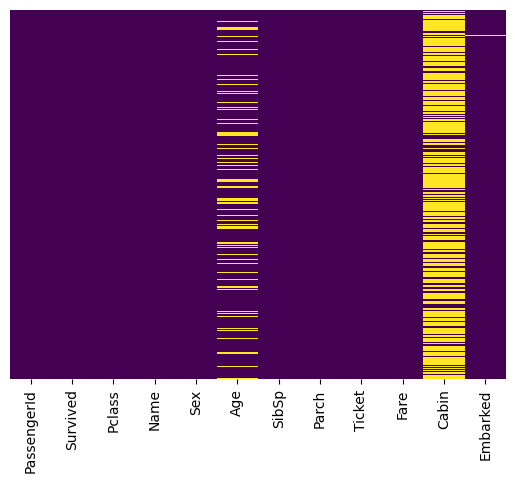

In [10]:
# Plot heatmap to visualize locations of missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
# count missing values in each variable
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# find missing value percent for each variable
null_percent = df.isnull().sum()/len(df)*100
null_percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
new_df = df.copy()

<Axes: >

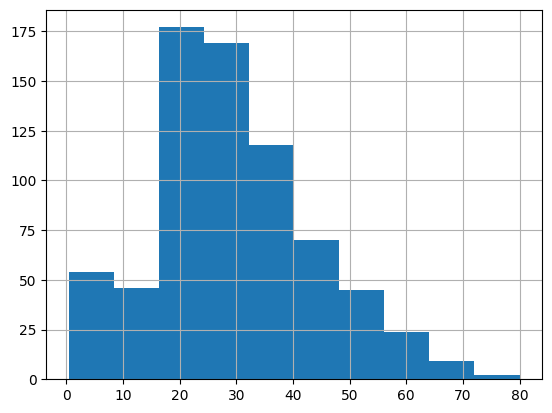

In [14]:
# Handle missing values in "Age" column

# Since "Age" is numerical data, first see distribution of "Age".
# Look for "outliers" or "skewed pattern"

var_ = 'Age'
new_df[var_].hist()

In [15]:
new_df[var_].mean()

29.69911764705882

In [16]:
new_df[var_].median()

28.0

In [17]:
# Since histogram of "Age" is skewed,
# median is better measure of centrality than mean.

# Replace "Age" missing values with median
new_df[var_].fillna(df[var_].median(), inplace=True)
new_df[var_].mean()

29.36158249158249

In [18]:
# Handle missing values in "Embarked" column
var2_ = 'Embarked'
new_df[var2_].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
# Since "Embarked" is categorical data,
# mode will be used as measure of centrality.

# Find mode from frequency of each unique value
new_df[var2_].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [20]:
# Replace "Embarked" missing values with mode (value with maximum frequency)

new_df[var2_].fillna('S', inplace=True)

In [21]:
# Handle missing values in "Cabin" column
var3_ = 'Cabin'
new_df[var3_].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
# Since there are too many unique values for "Cabin",
# mode will not represent most values here.

# In this case, it is better to drop the entire "Cabin" variable (column)
new_df.drop([var3_], inplace=True, axis=1)

<Axes: >

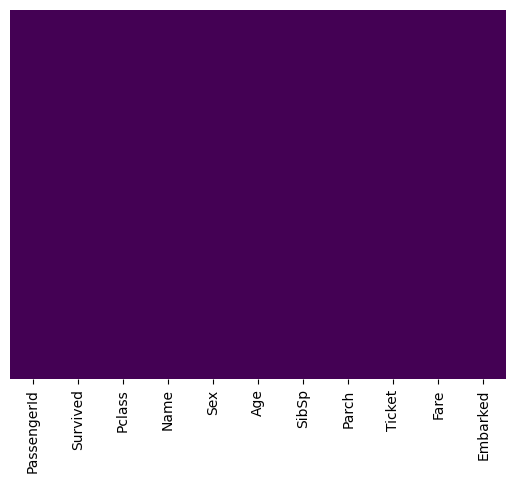

In [23]:
# Handle all 3 missing variables

# Plot heatmap to verify whether there are missing values left.
sns.heatmap(new_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
# Check out updated size
new_df.shape

(891, 11)

In [25]:
# After replacing and removing missing values, re-check %missing data
new_df.isnull().sum()/len(new_df)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

## Data Distributions / Histograms

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

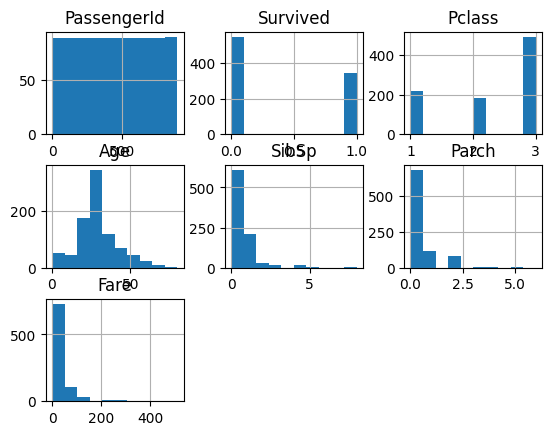

In [26]:
# Plot histograms for numerical variables
new_df.hist()

Text(0, 0.5, 'Frequency')

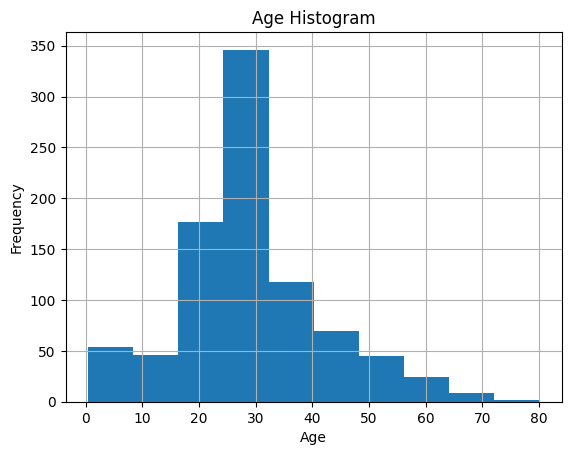

In [27]:
selected_var = 'Age'

# All 3 lines below construct "frequency" histogram for Age
new_df[selected_var].hist()
#new_df.hist(column=selected_var)
#new_df.Age.hist()

plt.title(selected_var + ' Histogram')
plt.xlabel(selected_var)
plt.ylabel('Frequency')

Text(0, 0.5, 'Probability')

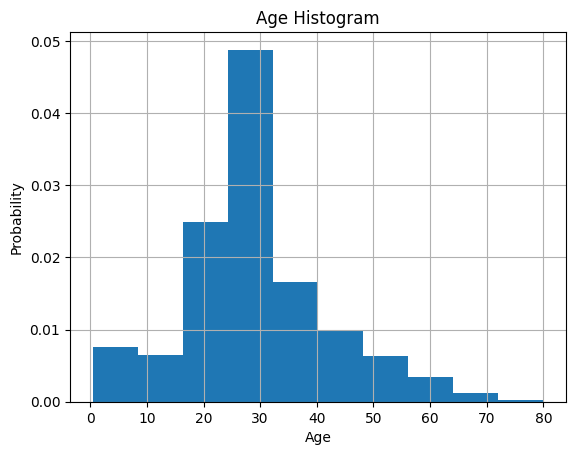

In [28]:
# Construct "probability" histogram for Age
new_df.hist(column=selected_var, density=True)
plt.title(selected_var + ' Histogram')
plt.xlabel(selected_var)
plt.ylabel('Probability')

Text(0, 0.5, 'Frequency')

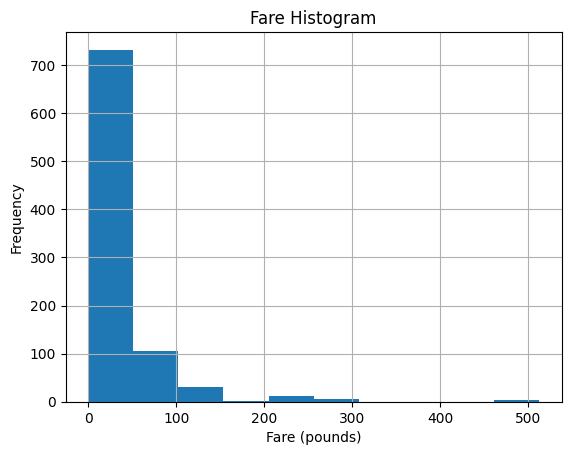

In [29]:
# Plot frequency histogram with another variable "Fare"
selected_var2 = 'Fare'
new_df[selected_var2].hist()
plt.title(selected_var2 + ' Histogram')
plt.xlabel('Fare (pounds)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

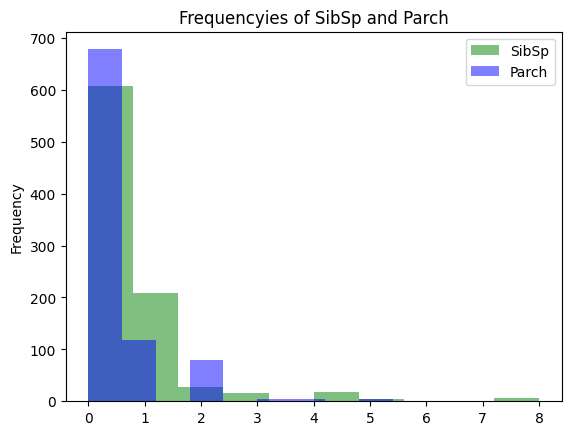

In [30]:
# Plot overlay histograms of multiple variables
pair_var1 = 'SibSp'
pair_var2 = 'Parch'
plt.hist(new_df.SibSp, label=pair_var1, color='green', alpha=0.5)
plt.hist(new_df.Parch, label=pair_var2, color='blue', alpha=0.5)

plt.legend()
plt.title('Frequencyies of ' + pair_var1 + ' and ' + pair_var2)
plt.ylabel('Frequency')

## Boxplots

In [31]:
# List names of variables
new_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<Axes: xlabel='Age'>

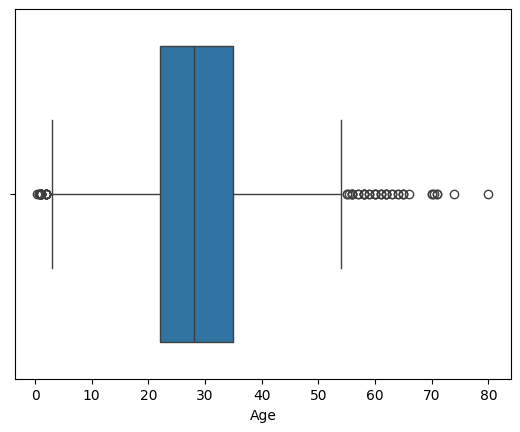

In [32]:
# Plot boxplot of Age variable
sns.boxplot(x='Age', data=new_df)

<Axes: xlabel='Survived', ylabel='Age'>

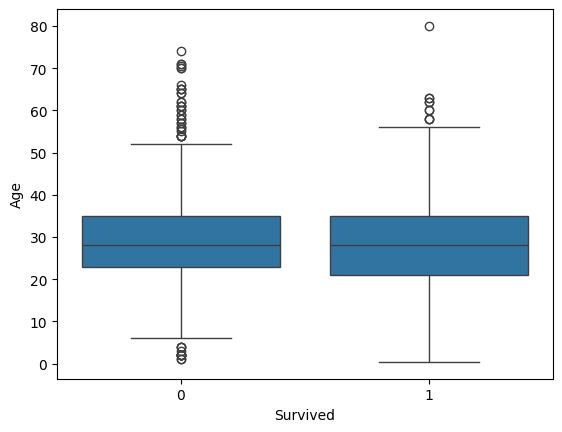

In [33]:
# Plot boxplots of 2 data subsets, splitted by 'Survived'
x_var = 'Survived'
sns.boxplot(x=x_var, y='Age', data=new_df)

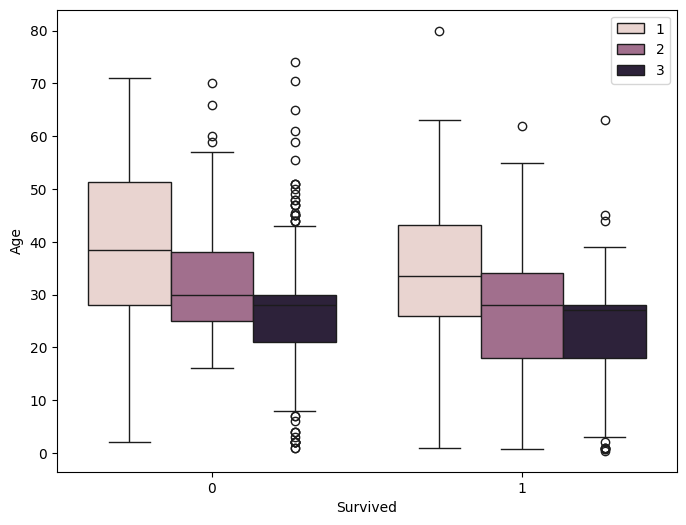

In [34]:
# Plot boxplots of data, splitted by 'Survived' AND 'Passenger Class'
fig = plt.figure(figsize = (8,6))
hue_var = 'Pclass'
sns.boxplot(x='Survived',y='Age', data=new_df, hue='Pclass')
plt.legend(loc='upper right')

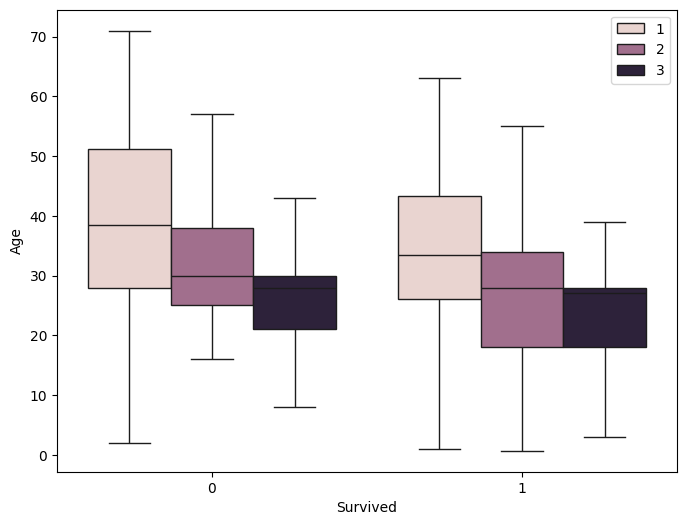

In [35]:
# Plot boxplots of data, splitted by 'Survived' AND 'Passenger Class'
# Plot without outliers

fig = plt.figure(figsize = (8,6))
sns.boxplot(x='Survived', y='Age', data=new_df, hue='Pclass', showfliers=False)
plt.legend(loc='upper right')

## Descriptive Statistics : Centrality and Dispersion

In [36]:
# Check out whether each variable (column) is numerical or categorical data
new_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
new_df.mean()

In [38]:
# To remove the warning above, can use only numerical data
new_df.mean(numeric_only=True)

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.361582
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [39]:
# List variable names
new_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [40]:
# Create new dataframe, num_df, containing only numerical variable names
num_columns = ['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare']
num_df = new_df[num_columns]

In [41]:
# Compute basic statistic values of numerical data
num_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
num_df.mean()

Survived     0.383838
Pclass       2.308642
Age         29.361582
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

In [43]:
#num_df.mode()
num_df.mode().loc[0,]

Survived     0.00
Pclass       3.00
Age         28.00
SibSp        0.00
Parch        0.00
Fare         8.05
Name: 0, dtype: float64

In [44]:
# Compute basic statistic values of specific numerical varialbe
selected_var = 'Age'
new_df[selected_var].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [45]:
# Compute basic statistic of sub-datasets
num_df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.028233,0.553734,0.329690,22.117887
1,1.950292,28.291433,0.473684,0.464912,48.395408


In [46]:
# Compute standard deviation
num_df.std()

Survived     0.486592
Pclass       0.836071
Age         13.019697
SibSp        1.102743
Parch        0.806057
Fare        49.693429
dtype: float64

In [47]:
# Compute IQR
num_df.quantile(0.75) - num_df.quantile(0.25)

Survived     1.0000
Pclass       1.0000
Age         13.0000
SibSp        1.0000
Parch        0.0000
Fare        23.0896
dtype: float64

In [48]:
# Compute Coefficient of variation
num_df.std() / num_df.mean()

Survived    1.267701
Pclass      0.362149
Age         0.443426
SibSp       2.108464
Parch       2.112344
Fare        1.543073
dtype: float64

In [49]:
# Compute skewness of variables
num_df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

## Outlier Removals

array([[<Axes: title={'center': 'Fare'}>]], dtype=object)

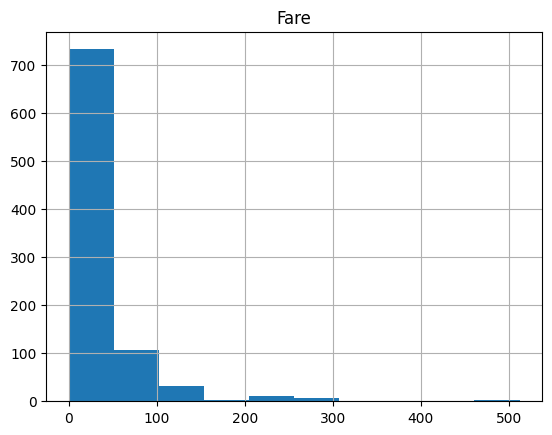

In [50]:
# See histogram of variable, possibly having outliers
outlier_var = 'Fare'
num_df.hist(column=outlier_var)

<Axes: xlabel='Fare'>

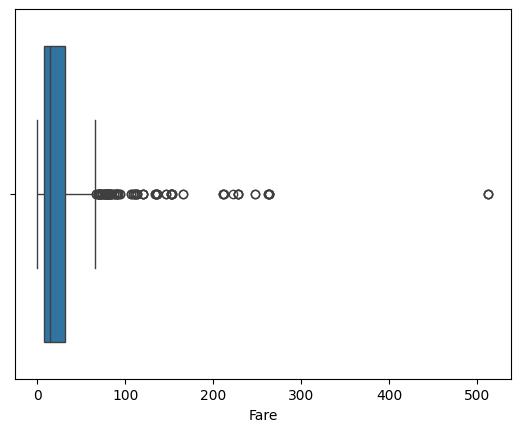

In [51]:
# See boxplot of variable, possibly having outliers
sns.boxplot(x=outlier_var, data=num_df)

<Axes: xlabel='Fare'>

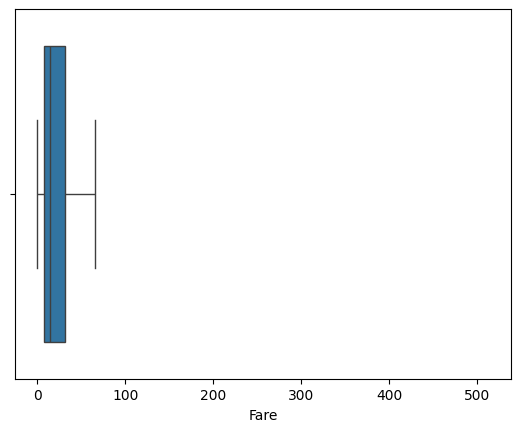

In [52]:
sns.boxplot(x=outlier_var, data=num_df, fliersize=0)
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

array([[<Axes: title={'center': 'Fare'}>]], dtype=object)

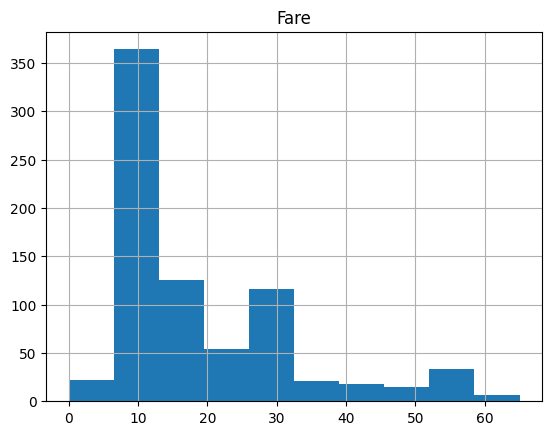

In [53]:
# Outliers removals by IQR-based threshold
q1 = num_df[outlier_var].quantile(0.25)
q3 = num_df[outlier_var].quantile(0.75)
iqr = q3-q1
temp_df = num_df[~((num_df[outlier_var] < q1-1.5*iqr) | (num_df[outlier_var] > q3+1.5*iqr))]
temp_df.hist(column=outlier_var)

array([[<Axes: title={'center': 'Fare'}>]], dtype=object)

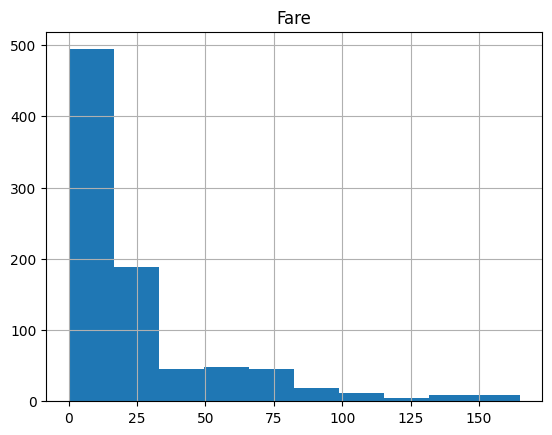

In [54]:
# Outliers removals by SD-based thresholds
mean = num_df[outlier_var].mean()
sd = num_df[outlier_var].std()
temp_df2 = num_df[~((num_df[outlier_var] < mean-3*sd) | (num_df[outlier_var] > mean+3*sd))]
temp_df2.hist(column=outlier_var)

array([[<Axes: title={'center': 'Fare'}>]], dtype=object)

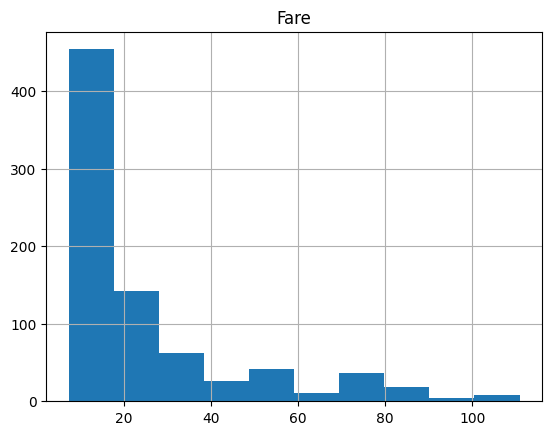

In [55]:
# Outliers removals by 5% and 95% percentiles
p05 = num_df[outlier_var].quantile(0.05)
p95 = num_df[outlier_var].quantile(0.95)
temp_df3 = num_df[~((num_df[outlier_var] < p05) | (num_df[outlier_var] > p95))]
temp_df3.hist(column=outlier_var)

In [56]:
# Check out the updated size after outlier removals
print(temp_df.shape)
print(temp_df2.shape)
print(temp_df3.shape)

(775, 6)
(871, 6)
(803, 6)


## Scatter Plots and Correlation

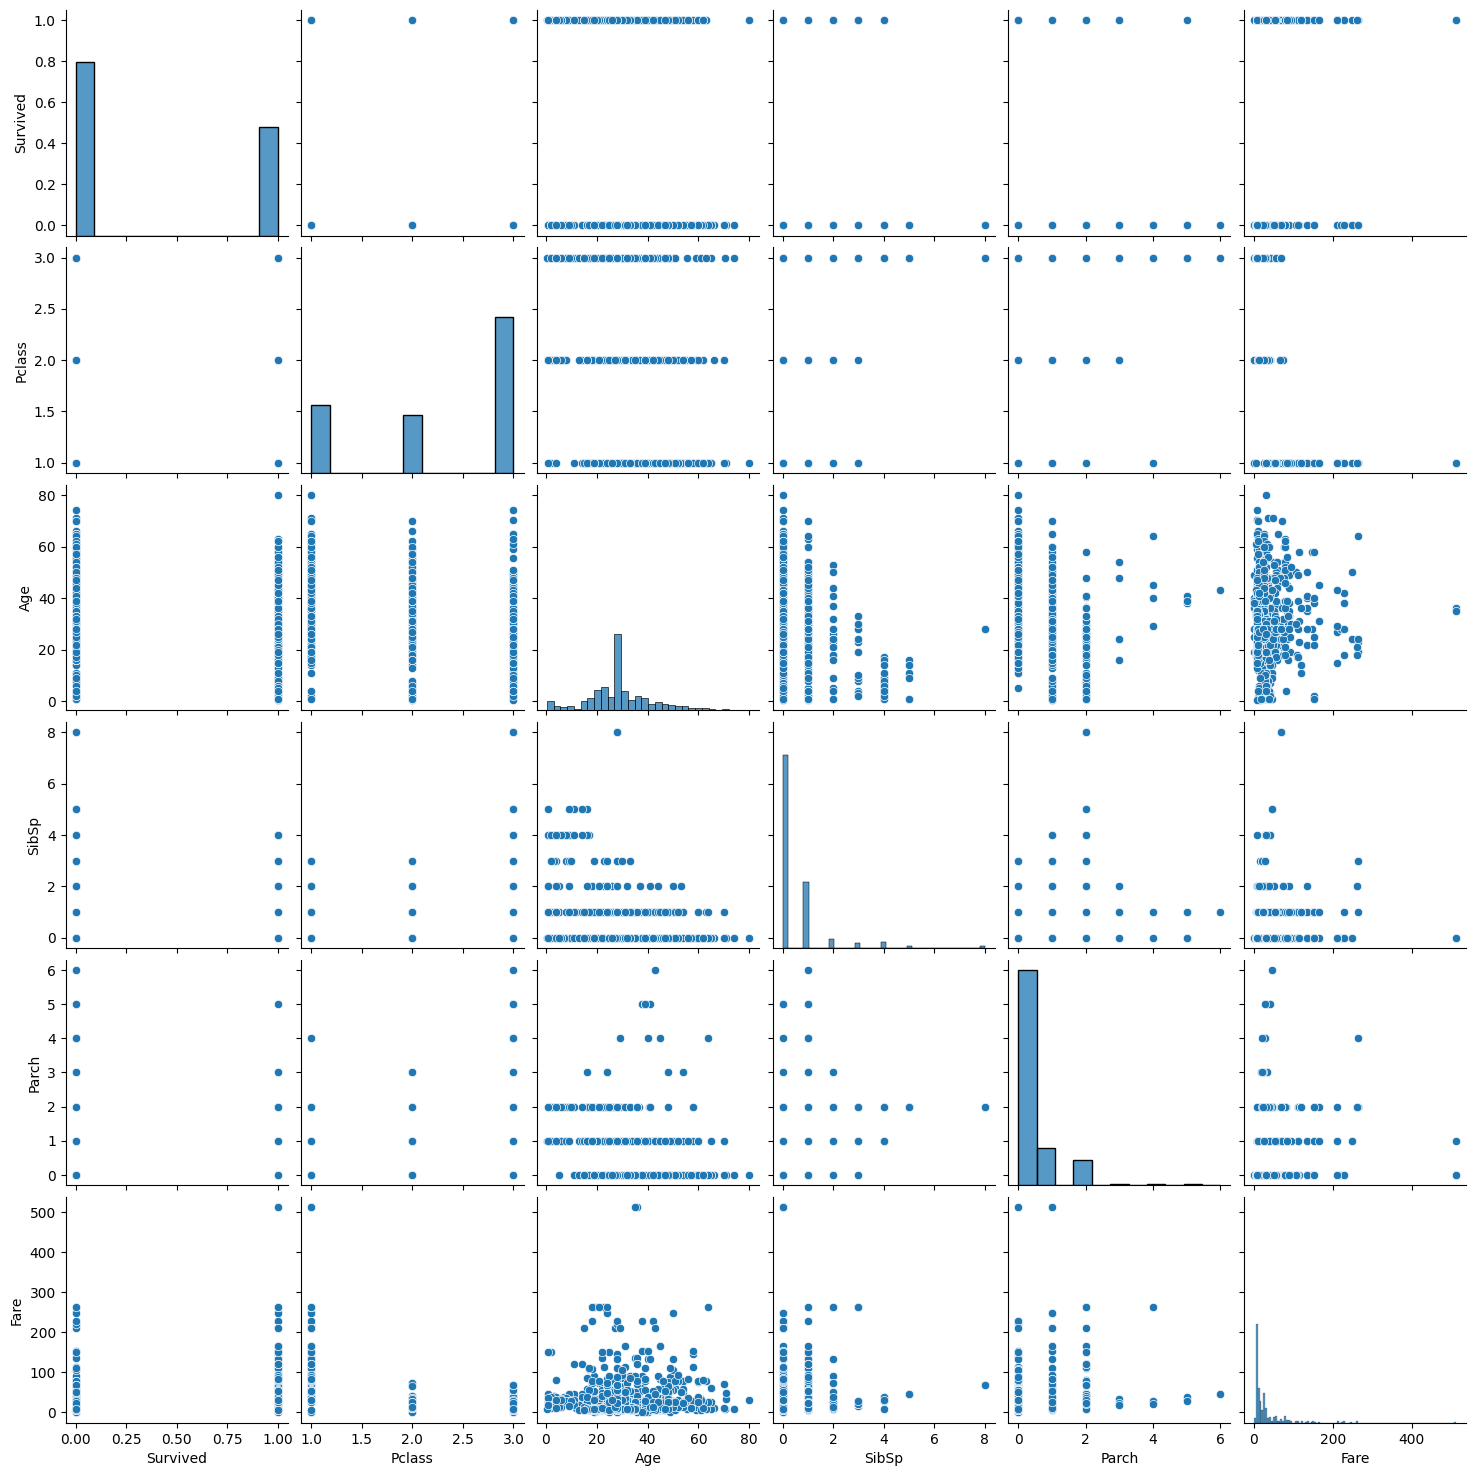

In [57]:
# Plot scatterplot matrix
sns.pairplot(num_df)

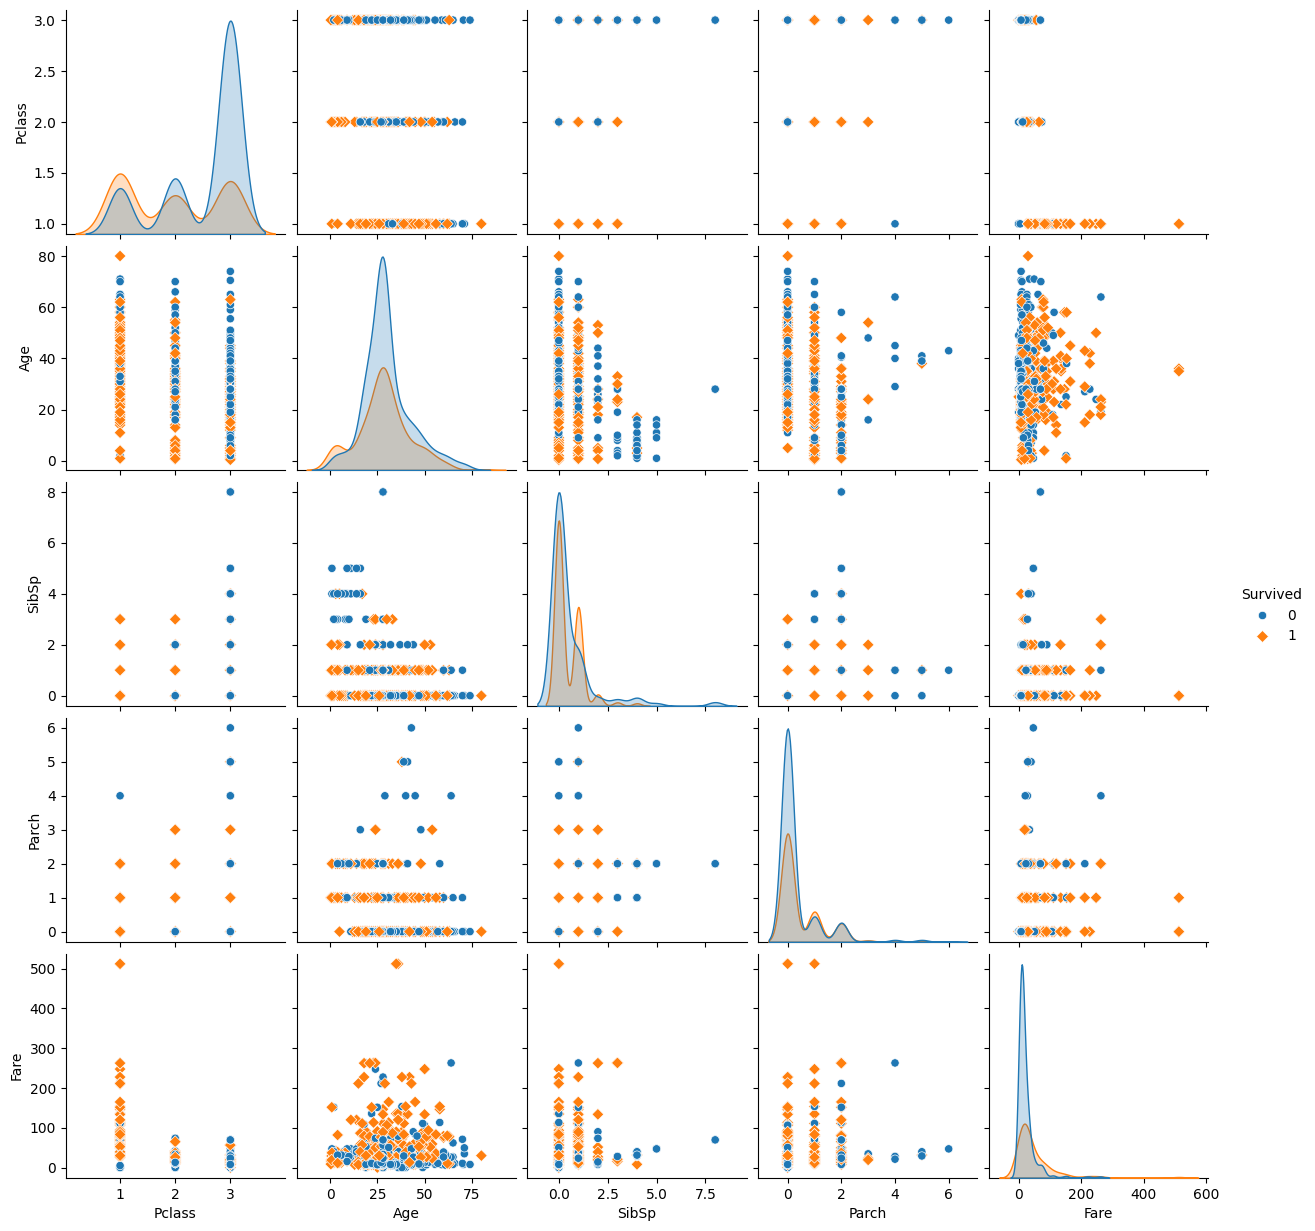

In [58]:
# Plot scatterplot matrix of sub-datasets
hue_var = 'Survived'
sns.pairplot(num_df, hue=hue_var, markers=["o", "D"])

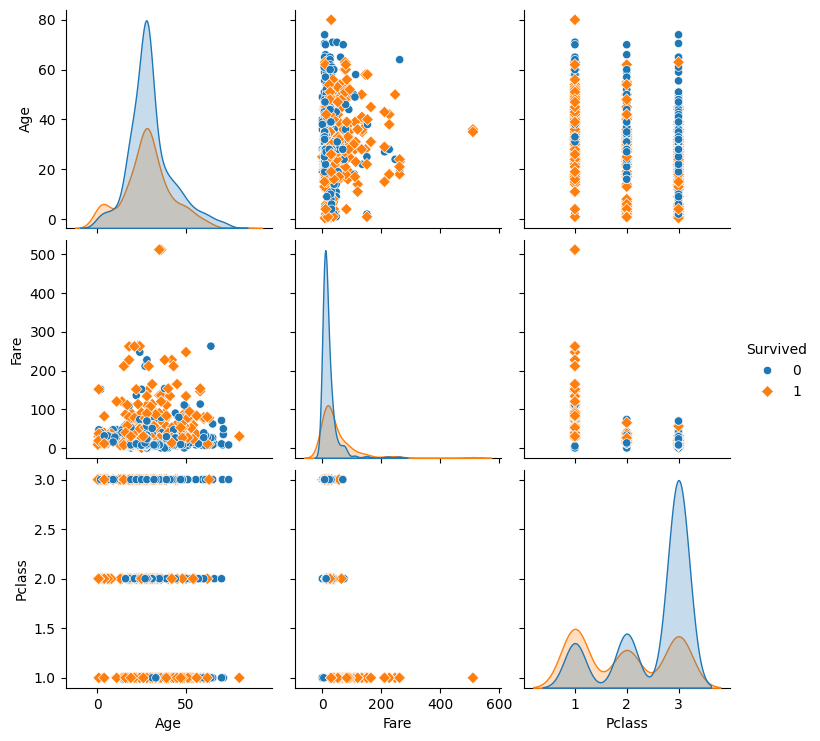

In [59]:
# Plot scatterplot matrix of specific variables
sns.pairplot(num_df, vars = ['Age', 'Fare', 'Pclass'], hue=hue_var, markers=["o", "D"])

<Axes: >

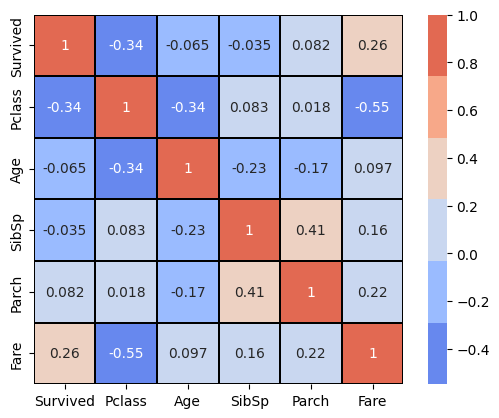

In [60]:
# Plot heatmap of correlation coefficients
sns.heatmap(num_df.corr(),
            square=True,
            linewidths=0.25,
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)

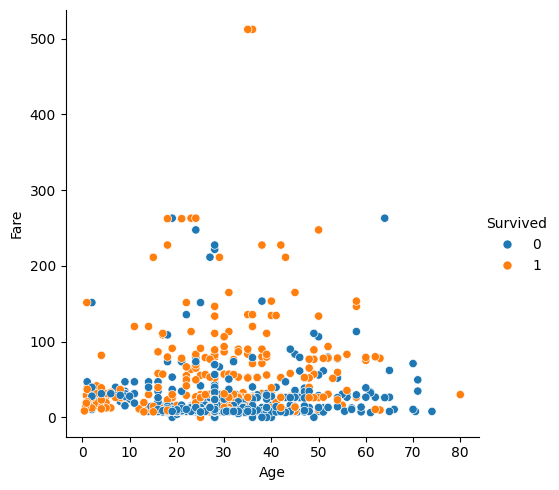

In [61]:
# Plot scatter plot of one variable pair
sns.relplot(data=num_df,
            x="Age",
            y="Fare",
            hue=hue_var)

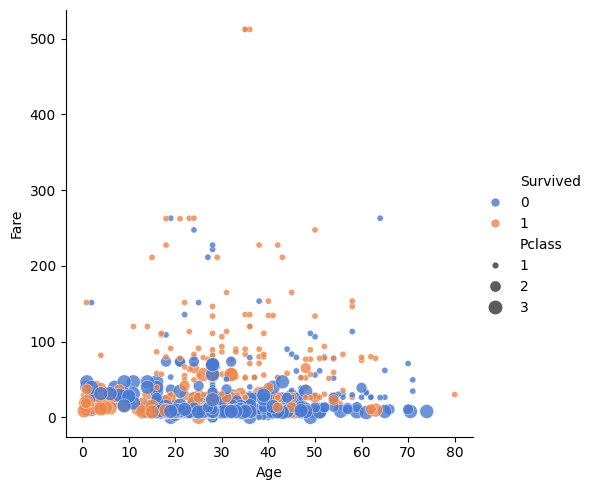

In [62]:
# Plot bubble plot of four variables
sns.relplot(data=num_df,
            x="Age",
            y="Fare",
            hue=hue_var,
            size="Pclass",
            sizes=(20, 100),
            alpha=0.8,
            palette=sns.color_palette("muted",len(num_df['Survived'].unique())))

### Analyze Categorical Data

<Axes: >

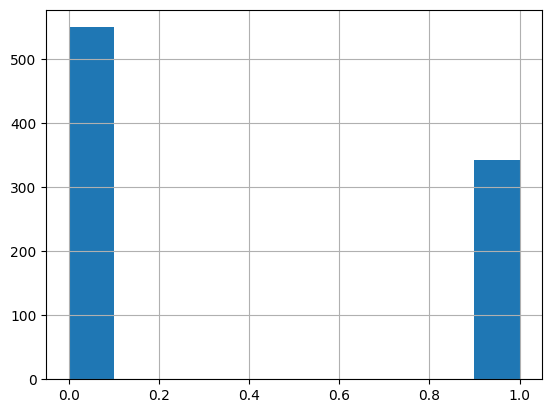

In [63]:
# Plot frequency histogram
new_df.Survived.hist()

<Axes: >

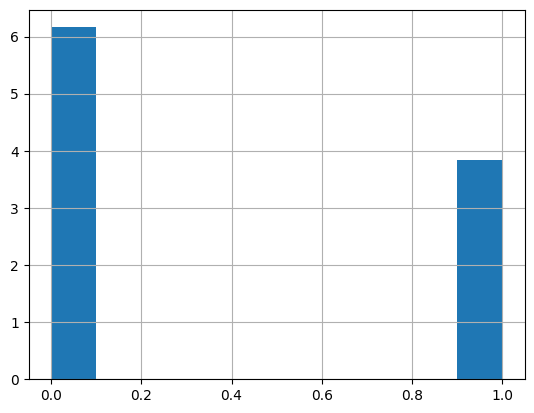

In [64]:
new_df.Survived.hist(density=True)

Text(0, 0.5, 'Probability')

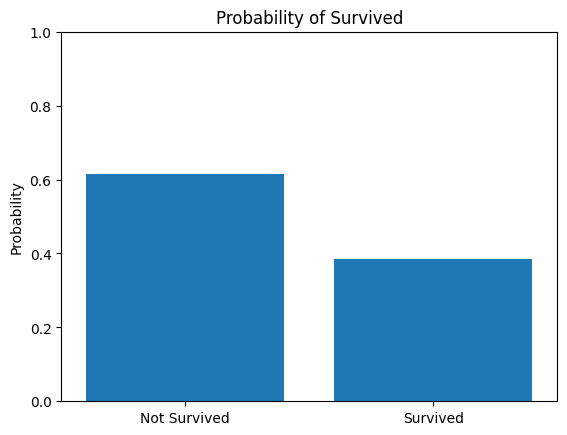

In [65]:
# Find probablity of survivors

selected_var = 'Survived'
#selected_var = 'Pclass'
temp_df = new_df[selected_var].value_counts(normalize=True)
temp_df = temp_df.reindex(sorted(temp_df.index))

plt.bar(['Not Survived', 'Survived'], temp_df)
plt.xlim(-0.5, 1.5)
plt.ylim(0,1)
plt.title('Probability of Survived')
plt.ylabel('Probability')

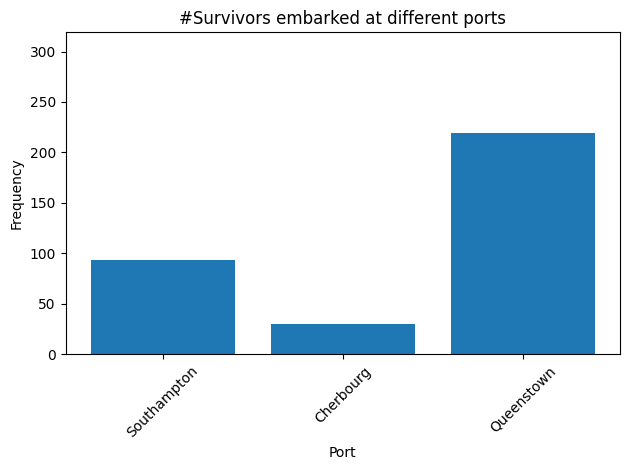

In [66]:
# Among survivors, find probablity of them embarking on different ports

survived_df = new_df[new_df.Survived == 1]
selected_var2 = 'Embarked'
temp_df = survived_df[selected_var2].value_counts()
temp_df = temp_df.reindex(sorted(temp_df.index))

fig = plt.figure()
plt.bar(temp_df.index, temp_df)
plt.title('#Survivors embarked at different ports')
plt.xlabel('Port')
plt.ylabel('Frequency')
plt.ylim(0,temp_df.max()+ 100)
x_labels = ['Southampton', 'Cherbourg', 'Queenstown']
plt.xticks(ticks=temp_df.index,labels=x_labels, rotation=45)

plt.tight_layout()
plt.savefig('survived_embarked_bar.jpg')

# See more about bar graph at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

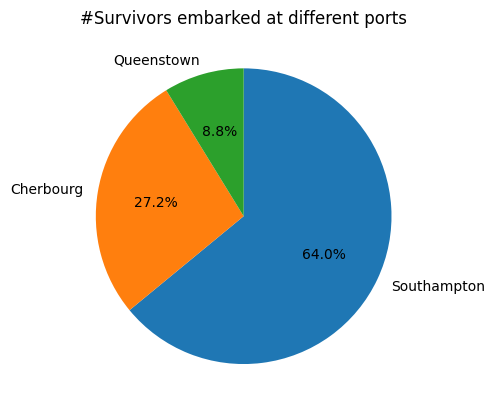

In [67]:
survived_df = new_df[new_df.Survived == 1]
selected_var2 = 'Embarked'
temp_df = survived_df[selected_var2].value_counts()

fig = plt.figure()
x_labels = ['Southampton', 'Cherbourg', 'Queenstown']
plt.pie(temp_df, labels=x_labels, autopct='%1.1f%%',startangle=90, counterclock=False)
plt.title('#Survivors embarked at different ports')

plt.savefig('survived_embarked_pie.jpg')

# See more about pie graph at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie